# Class 17: Writing functions and introduction to statistical inference

In this notebook we will continuing learning some of the fundamentals of Python, namely writing functions. Then we will begin discussion statistical inference where we use a smaller sample of data to make claims about a larger population of data. 

In [64]:
import YData

# YData.download.download_class_code(17)   # get class code    
# YData.download.download_class_code(17, TRUE) # get the code with the answers 

# YData.download.download_class_file('project_template.ipynb', 'homework')  # downloads the class project template 
# YData.download_homework(7)  # downloads the 7th homework 

YData.download_data("movies.csv")
YData.download_data('daily_bike_totals.csv')
YData.download_image("powers.jpg")

The file `movies.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `daily_bike_totals.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `powers.jpg` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [65]:
## If you are using Google Colabs, you should install the YData packages and mount the your google drive by uncommenting and running the code below.

# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. Warm-up/review: using for loops to the temperature range on each day

The code below extracts two lists that have the the high and low temperatures from 2014 in NYC. 

Please use for loops to create a list called `temp_range` that has the temperature range (high - low temperature) for each day.

There are a few ways to do this, so see if you can come up with a solution that works. Try to do this without using numpy, and once you have a solution, see if you can get the same result using numpy. 



In [67]:
import pandas as pd
import matplotlib.pyplot as plt

bikes = pd.read_csv("daily_bike_totals.csv", parse_dates = [0])
bikes_2014 = bikes.query("date > '2013-12-31'").query("date < '2015-01-01'")

max_temps = bikes_2014["max_temperature"].to_list()
min_temps = bikes_2014["min_temperature"].to_list()

print(max_temps[0:5])
print(min_temps[0:5])

[33.08, 33.08, 18.14, 29.12, 39.92]
[24.26, 18.14, 9.14, 8.24, 27.14]


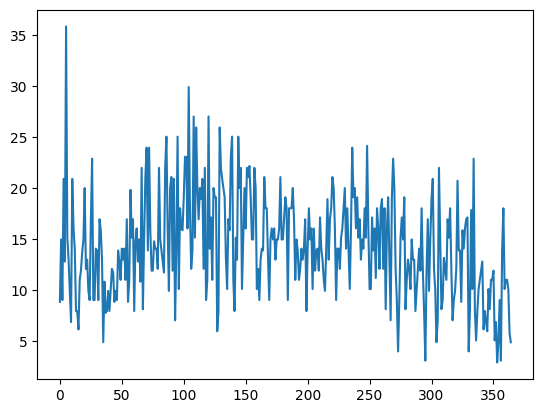

In [68]:
# Create a list called "temp_range" that has the temperature range for each day in 2014...

# Start with an empty list
temp_range = [];


# Use a for loop to add the temperature range for each day
for i in range(len(max_temps)):

    curr_max = max_temps[i]
    curr_min = min_temps[i]
    temp_range.append(curr_max - curr_min)



# Plot the range of temperatures
plt.plot(temp_range);


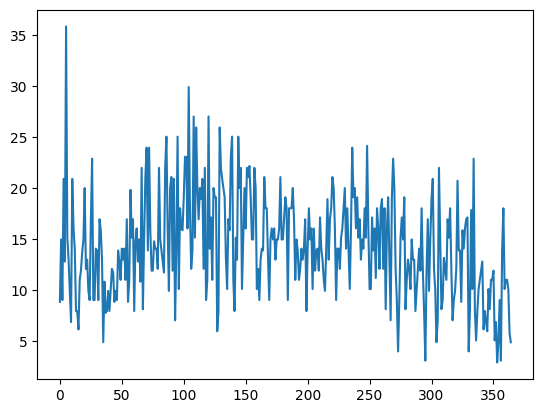

In [69]:
# Alternative solution using the zip function...

# Start with an empty list
temp_range2 = [];


# Use a for loop to add the temperature range for each day
for curr_max, curr_min in zip(max_temps, min_temps):

    temp_range2.append(curr_max - curr_min)



# Plot the range of temperatures
plt.plot(temp_range2);


In [70]:
# Can you do the same calculation using numpy arrays?  
# Which is easier? 
import numpy as np

temp_range_array = np.array(max_temps) - np.array(min_temps)


# checking they are the same
np.sum(temp_range_array == np.array(temp_range))


np.int64(365)

## 2a. Review of comparisons

Let's do a very quick review of mathematical and string comparisons in Python.

In [71]:
# Basic math comparison
3 > 1

True

In [72]:
# Checking the type of a basic math comparison
type(3 > 1)

bool

In [73]:
# We use == to compare whether two items are equal (not 3 = 3)
3 == 3

True

In [74]:
# We can use the `and` keyword to combine multiple logical statements 
n1 = 20
n2 = 2

n1 > 10 and n2 > 5

False

In [75]:
# We can also use the `or` keyword to combine multiple logical statements 
n1 > 10 or n2 > 5

True

In [76]:
# We can also compare strings
"my string" == "my string"

True

In [77]:
# Stings compare alphabetically
"cats" < "dogs"

True

In [78]:
# Shorter words occur earlier than longer words that have matching letters
"cat" < "catastrophe"

True

## 2b. Conditional Statements 

Conditional statements allow use to excecute particular pieces of code when certain conditions are met; i.e., they execute a piece of code when a Boolean value is True. 

Let's explore!

In [79]:
num_semesters = 7

if num_semesters <= 0:
    print('Not a valid input')
elif num_semesters <= 2:
    print('First Year')
elif num_semesters <= 4:
    print('Sophomore')
elif num_semesters <= 6:
    print('Junior')
elif num_semesters <= 8:
    print('Senior')
else:
    print("NA")


Senior


In [80]:
# Let's look at a conditional statement in a loop

for num_semesters in range(10):
    
    print(num_semesters)

    if num_semesters <= 0:
        print('Not a valid input')
    elif num_semesters <= 2:
        print('First Year')
    elif num_semesters <= 4:
        print('Sophomore')
    elif num_semesters <= 6:
        print('Junior')
    elif num_semesters <= 8:
        print('Senior')
    else:
        print("NA")


0
Not a valid input
1
First Year
2
First Year
3
Sophomore
4
Sophomore
5
Junior
6
Junior
7
Senior
8
Senior
9
NA


## 3. Functions!

We have already used many functions in this class that are built into Python or are imported from different modules/packages. 

Let's now write some new functions outselves! 


In [81]:
# Write a function that doubles a value
def double(x):
    return x * 2

In [82]:
# Try the function out 1
double(7)

14

In [83]:
# Try the function out 2
double(15/3)

10.0

In [84]:
# Try the function out 3
my_number = 12
double(my_number)

24

In [85]:
# Try the function out 4
double(my_number / 8)

3.0

In [86]:
# Will this work?
double(np.array([3, 4, 5]))

array([ 6,  8, 10])

In [87]:
# Will this work? 
double('data')

'datadata'

In [88]:
# What about this? 
double(True)

2

In [89]:
# "local scope"
# x

In [90]:
# Let's set x to 17 
x = 17

In [91]:
# Double 2
double(2)

4

In [92]:
# Did x change?
x

17

In [93]:
# What if we double x? 
double(x)

34

In [94]:
# Did x change?
x

17

### Function extras: docstrings

When writing functions that will be used by other people (or your future self) it is important to write some documentation describing how your function works. In Python, this type of documentation is called a "docstring". The text in a docstring is in triple quotes which allows for multi-line comments.

There are a number of [convensions](https://peps.python.org/pep-0257/) surrounding on how to write a docstring, including: 

- The doc string line should begin with a capital letter and end with a period.
- The first line should be a short description.
- If there are more lines in the documentation string, the second line should be blank, visually separating the summary from the rest of the description.
- The following lines should be one or more paragraphs describing the object’s calling conventions, its side effects, etc.


In [95]:
def double(x):
    """Take a number and doubles it.
    
    Parameters:
    x (int): A number that should be doubled
    
    Returns:
    int: The numbers that is doubled
    
    """
    return x * 2

In [96]:
# View the docstring
? double

Signature:  double(x)
Docstring:
Take a number and doubles it.

Parameters:
x (int): A number that should be doubled

Returns:
int: The numbers that is doubled
File:      /tmp/ipykernel_3002686/4122166559.py
Type:      function

## Multiple arguments and default values

We can also write functions that take multiple arguments and we can set particular arguments to have default values that are used if no value for an argument is given. 

Let's explore this...



In [97]:
# Define powerit function 
def powerit(x, pow):
    return x**pow

In [98]:
# Use the function 
powerit(2, 3)

8

In [99]:
# Try the function with a single argument
#powerit(2)

In [100]:
# Set a default argument value

def powerit(x, pow = 3):
    return x**pow

In [101]:
# Try the new function with a single argument
powerit(2)

8

In [102]:
# Try the function with two arguments
powerit(2, 5)

32

![higher powers](powers.jpg)

## Multiple return values 

We can also write funciton that can return multiple values. We can do this by returning a tuple. 

Recall, tuples are a basic data structure in Python that is like a list. However, unlike lists, elements in tuples are "immutable" meaning that once we create a tuple, we can not modify the values in the tuple.

We create tuples by using values in parentheses separated by commas:

`my_tuple = (10, 20, 30)`

Let's explore tuples now... 

In [103]:
# Recall tuples
my_tuple = (10, 20, 30)

my_tuple

(10, 20, 30)

In [104]:
# We can access elements of the tuple using square brackets (the same as lists)
my_tuple[1]

20

In [105]:
# Unlike a list, we can't reassign values in a tuple 
#my_tuple[1] = 50

In [106]:
# We extract values from tuples into regular names using "tuple unpacking"

val1, val2, val3 = my_tuple


val3

30

Let's create a function `power23(x)` that returns a number squared and a number cubed. 

In [107]:
# Create a function that returns a value squared and cubed

def sqr_and_cube(x):
    
    return (x**2, x**3)

In [108]:
sqr_and_cube(2)

(4, 8)

In [109]:
# We can use "tuple unpacking" to assign both outputs to different names
squared, cubed = sqr_and_cube(2)  

print(squared)
print(cubed)

4
8


## Passing functions as input arguments

We can also pass functions as input arguments to other functions. Let's explore this...

In [110]:
def compute_on_my_array(stat_function):
    
    my_array = np.array([21, 44, 54, 23, 25, 32])
    
    calculated_val = stat_function(my_array)
    
    return calculated_val

In [111]:
# Apply the np.mean function to my_array
compute_on_my_array(np.mean)

np.float64(33.166666666666664)

In [112]:
# Apply the np.sum function to my_array
compute_on_my_array(np.sum)

np.int64(199)

In [113]:
# Apply power23 to my_array
compute_on_my_array(sqr_and_cube)

(array([ 441, 1936, 2916,  529,  625, 1024]),
 array([  9261,  85184, 157464,  12167,  15625,  32768]))

## 4. Additional practice writing functions

As additional pracice, let's write a function that will mimic flipping coins. This function will be useful when we start talking about statistical inference. 

In particular, let's write a function called `flip_coins(n, prob)` which will simulate flipping a coin `n` times where:
- `n` is the number of times we have flipped the coin
- `prob` is the probability that each coin flip will return "head"

The function should return the number of "heads" that occurred from flipping the coin `n` times; i.e., it should return a number between 0, which means no heads occurred, and `n` which means a "head" occurred on every flip. 

When writing functions, it is often useful to write the bulk of the code outside of a function and then turn in into a function by wrapping your code in a `def` statement. Let's go through a few steps of writing this function now. 


#### Step 1: Generating random numbers between 0 and 1

We can use the numpy function `np.random.rand(n)` to generate `n` random numbers. Please create a name called `n` and set it equal to 500 to simulate 500 random coin flips. Then use the name `n`, along with the `np.random.rand(n)` to generate 500 random numbers between 0 and 1. Save these random numbers to the name `rand_nums`. 

Finally, to see what these numbers look like, visualize `rand_nums` using a histogram. 


[0.10699317 0.3228738  0.50030981 0.33857293 0.67764808 0.74879761
 0.01936549 0.31425827 0.2711299  0.45466142]


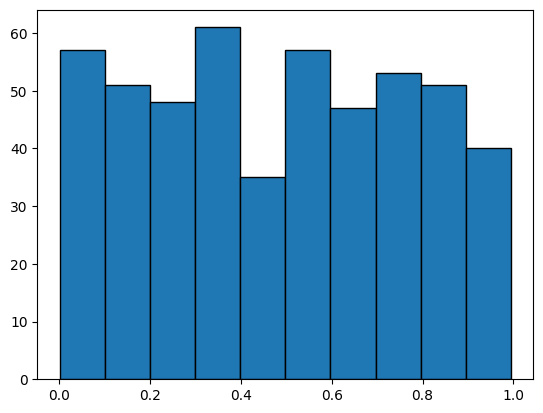

In [114]:
# Use np.random.rand() to generate n = 500 random numbers between 0 and 1, and visualize them as a histogram. 

n = 500

rand_nums = np.random.rand(n)

print(rand_nums[0:10])

plt.hist(rand_nums, edgecolor = "k");


#### Step 2: Count the number of "heads"

Next create a name called `prob` which has the probability that a coin flip is a "head". Let's set `prob` to be equal to .5 to simulate flipping a fair coin. Then see how many of the `rand_nums` are less than the `prob` value to see how many of your coin flips were "head"; i.e., use `np.sum()` to count how many of your coin flips were heads. 



In [115]:
# Set prob to .5 and count how many values are greater than prob

prob = .5

np.sum(rand_nums <= prob)

np.int64(255)

#### Step 3: Creating the function flip_coins(n, prob)

Now write the function `flip_coins(n, prob)` by taking the code you wrote in the previous two steps and turning it into a function. 

Then try out the function a few times and see how the number of "heads" you get varies from simulation to simulation, and also experiment with different values for the arguments `n` and `prob`. 


In [116]:
# Create a function flip_coins(n, prob) that generates n random numbers and returns how many are less than prob

def flip_coins(n, prob):
    rand_nums = np.random.rand(n)
    num_heads = np.sum(rand_nums <= prob)
    return num_heads
    

flip_coins(500, .5)

np.int64(244)

#### Step 4: Adding an additional argument to the function 

Let's add an additional parameter to the `flip_coins` function called `return_prop` which has a default value of `False`; i.e., the function should now be `flip_coins(n, prob, return_prop = False)`. If the `return_prop` is set to `True` that it should return the proportion of coin flips that were heads rather than the number of coin flips that were heads. 

Hint: Adding a conditional statement to your function could be useful. 



In [117]:
# Add an argument return_prop that when set to True will return the proporton of coin flips that were heads (rather than the number of heads)

def flip_coins(n, prob, return_prop = False):
    
    rand_nums = np.random.rand(n)
    num_heads = np.sum(rand_nums <= prob)
    
    if return_prop:
        return num_heads/n
    else:
        return num_heads
    
    
print(flip_coins(500, .5))
print(flip_coins(500, .5, True))


256
0.506


## 5. Statistical inference

In statistical inference we use a smaller sample of data to make claims about a larger population of data. 

As an example, let's look at the [2020 election](https://www.cookpolitical.com/2020-national-popular-vote-tracker) between Donald Trump and Joe Biden, and let's focus on the results from the state of Georgia. After all the votes had been counted, the resuts showed that:

- Biden received 2,461,854 votes
- Trump received 2,473,633 votes

Since we have all the votes on election data, we can precisely calculate the population parameter of the proportion of votes that Biden received, which we will denote with the symbol $\pi_{Biden}$. 

Let's create names `num_trump_votes` and `num_biden_votes`, and calculate `true_prop_Biden` which is the value $\pi_{Biden}$. 

In [118]:
num_trump_votes = 2461854  # 2,461,854
num_biden_votes = 2473633  # 2,473,633


# calculate the proportion of people who voted for Biden
true_prop_Biden = num_biden_votes/(num_biden_votes + num_trump_votes)

true_prop_Biden

0.5011932966290864

The code below creates a DataFrame called `georgia_df` that captures these election results. Each row in the DataFrame represents a votes. The column `Voted Biden` is `True` if a voter voted for Biden and `False` if the voter voted for Trump. 

In [119]:
biden_votes = np.repeat(True, num_biden_votes)     # create 2,473,633 Trues for the Biden votes
trump_votes = np.repeat(False, num_trump_votes)    # create 2,461,854 Falses for the Trump votes
election_outcome = np.concatenate((biden_votes, trump_votes))  # put the votes together

georgia_df = pd.DataFrame({"Voted Biden": election_outcome})  # create a DataFrame with the data
georgia_df = georgia_df.sample(frac = 1)   # shuffle the order to make it more realistic

georgia_df.head()

,Voted Biden
3563237,False
88533,True
147932,True
224133,True
3672601,False


Now suppose we didn't know the actual value of $\pi_{Biden}$ and we wanted to estimate it based on a poll of 1,000 voters. We can simulate this by using the pandas `.sample(n = )` method.

Let's simulate sampling random voters

In [120]:
# sample 10 random points
georgia_df.sample(10)  

,Voted Biden
1373498,True
402610,True
2370930,True
4738482,False
204017,True
1787270,True
2504787,False
3809145,False
3564211,False
4613243,False


In [121]:
# simulate proportions of voters that voted for Biden - i.e., p-hats

one_sample = georgia_df.sample(1000)

np.mean(one_sample['Voted Biden'])

np.float64(0.495)

### Creating a sampling distribution via taking random samples

Suppose 100 polls were conducted. How many of them would show that Biden would get the majority of the vote? 

Let's simulate this "sampling distribution" of statistics now... 


In [122]:
%%time

sample_size = 1000
num_simulations = 100

sampling_dist = []

for i in range(num_simulations):
    
    curr_sample = georgia_df.sample(sample_size)
    prop_biden = np.mean(curr_sample["Voted Biden"])
    sampling_dist.append(prop_biden)



CPU times: user 5.97 s, sys: 155 ms, total: 6.13 s
Wall time: 6.21 s


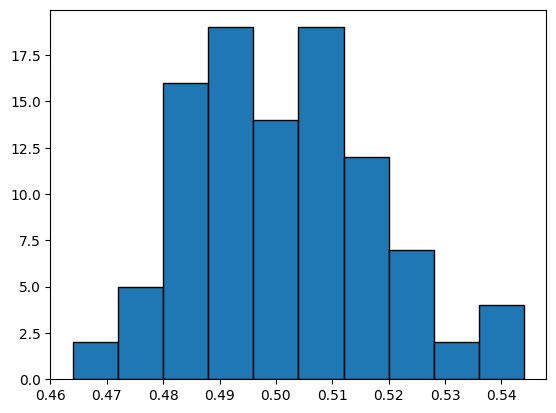

In [123]:
# plot a histogram of the sampling distribution

plt.hist(sampling_dist, edgecolor = "black");

### Creating a sampling distributions via coin flips (a faster way to simulate data)

Rather than simulating polling outcomes by pulling random samples from a DataFrame, let's simulate each vote by simulating randomly flipping a coin, where the probability of getting a "Head" (True value) is the probability of Biden getting a vote.

To do this we can use our `flip_coins(n, prob_heads, return_prop)` function we wrote in the warm-up exercises above. 
 


In [124]:
%%time

# sampling distribution of many polls conducted

sample_size = 1000
num_simulations = 100

sampling_dist = []

for i in range(num_simulations):
    prop_biden = flip_coins(sample_size,  true_prop_Biden, return_prop = True)
    sampling_dist.append(prop_biden)

CPU times: user 936 μs, sys: 0 ns, total: 936 μs
Wall time: 945 μs


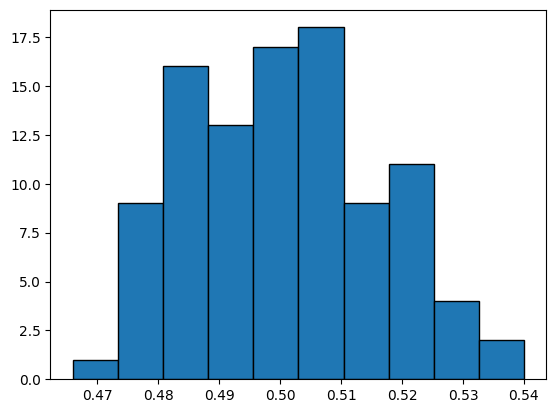

In [125]:
plt.hist(sampling_dist, edgecolor = "black", bins = 10);

In [ ]:
%%capture

# You can run this code to covert this Jupyter notebook into a pdf
!quarto render class_17_answers.ipynb --cache-refresh --to pdf 